In [1]:
import pandas as pd
import numpy as np
import os

from scipy import stats

In [2]:
cwd = os.getcwd()

df_mRNA = pd.read_csv(f'{cwd}\\data_primary\\mRNA_bulk.csv')
df_mRNA = df_mRNA.drop('Unnamed: 0',axis=1)

df_miRNA = pd.read_csv(f'{cwd}\\data_primary\\miRNA_bulk.csv')
df_miRNA = df_miRNA.drop('Unnamed: 0',axis=1)

df_miRNA

,gene_name,F18.MAA000377.3_9_M.1.1,J20.MAA000377.3_9_M.1.1,F19.MAA000377.3_9_M.1.1,J21.MAA000377.3_9_M.1.1,F20.MAA000377.3_9_M.1.1,J22.MAA000377.3_9_M.1.1,G11.MAA000377.3_9_M.1.1,K9.MAA000377.3_9_M.1.1,G13.MAA000377.3_9_M.1.1,...,A2.MAA100042.3_9_M.1.1,C4.MAA100042.3_9_M.1.1,A5.MAA100042.3_9_M.1.1,C6.MAA100042.3_9_M.1.1,A6.MAA100042.3_9_M.1.1,C7.MAA100042.3_9_M.1.1,A9.MAA100042.3_9_M.1.1,C9.MAA100042.3_9_M.1.1,A10.MAA100042.3_9_M.1.1,C10.MAA100042.3_9_M.1.1
0,Mir100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mir107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mir1191,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mir1192,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mir1195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mirlet7b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,Mirlet7c-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,Mirlet7d,0,0,0,0,22,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,Mirlet7f-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
temp_allgenes = df_mRNA.drop(df_mRNA.index[(df_mRNA.iloc[:,1:].sum(axis = 1) < 100)])
temp_allgenes = temp_allgenes.set_index('gene_name').T

In [49]:
corr_tally = pd.DataFrame(columns=['t'])

for col in temp_allgenes:
    corr_tally.loc[col] = [0]

In [56]:
temp_mir.shape

(981, 26)

In [57]:
temp_mir = df_miRNA.drop(df_miRNA.index[(df_miRNA.iloc[:,1:].sum(axis = 1) < 90)])
temp_mir = temp_mir.set_index('gene_name').T

corr_df = pd.DataFrame(columns=['r', 'p'])



# miCol = 3
# temp_mir.iloc[:,miCol]

for miCol in range(temp_mir.shape[1]):
    for col in temp_allgenes:
        r, p = stats.pearsonr(temp_mir.iloc[:,miCol], temp_allgenes[col])
        if(r>0.3):
            corr_tally.loc[col] = corr_tally.loc[col] + 1
        # corr_df.loc[col] = [round(r, 3), round(p, 3)]

# corr_df[(corr_df.r>0.3)]

In [59]:
corr_tally[corr_tally.t>0]

,t
0610005C13Rik,2
0610007C21Rik,2
0610007P14Rik,2
0610009B22Rik,3
0610009D07Rik,2
...,...
Zscan20,1
Zswim7,1
Zxdb,1
Zyx,2


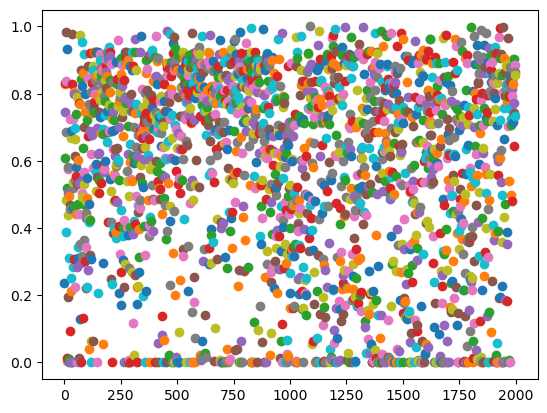

In [16]:
import matplotlib.pyplot as plt

T = range(corr_df.shape[0])

for i in range(2000):
    plt.scatter(i, corr_df.p[i])

plt.show()



In [ ]:
temp_mir126 = df_miRNA.set_index('gene_name').T
temp_mir126 = temp_mir126.Mir126



gene_name,Mir100,Mir107,Mir1191,Mir1192,Mir1195,Mir1199,Mir122a,Mir125a,Mir126,Mir130b,...,Mir697,Mir703,Mir706,Mir707,Mir744,Mirlet7b,Mirlet7c-2,Mirlet7d,Mirlet7f-1,Mirlet7g
F18.MAA000377.3_9_M.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
J20.MAA000377.3_9_M.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F19.MAA000377.3_9_M.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
J21.MAA000377.3_9_M.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F20.MAA000377.3_9_M.1.1,0,0,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,22,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C7.MAA100042.3_9_M.1.1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
A9.MAA100042.3_9_M.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C9.MAA100042.3_9_M.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A10.MAA100042.3_9_M.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
r, p = stats.pearsonr(temp_mir126, temp_allgenes.iloc[:,1])



In [27]:
corr_df = pd.DataFrame(columns=['r', 'p'])

for col in temp_allgenes:
    r, p = stats.pearsonr(temp_mir126, temp_allgenes[col])
    corr_df.loc[col] = [round(r, 3), round(p, 3)]

In [50]:
corr_df[(corr_df.r>0.3)]

,r,p
Acer2,0.330,0.0
Add3,0.332,0.0
App,0.384,0.0
Aqp1,0.452,0.0
Arap3,0.348,0.0
...,...,...
Tspan7,0.399,0.0
Ubqln2,0.340,0.0
Wnt2,0.434,0.0
Zfp449,0.357,0.0


In [54]:
corr_df[(corr_df.p>0.3)]

,r,p
0610007C21Rik,-0.012,0.710
0610007L01Rik,-0.008,0.810
0610007N19Rik,-0.015,0.643
0610007P08Rik,-0.004,0.909
0610008F07Rik,-0.028,0.381
...,...,...
Zyg11a,-0.012,0.718
Zyg11b,-0.009,0.785
Zyx,0.007,0.837
Zzz3,0.015,0.634
